# Tensorflow Implementation

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import torch
import tensorflow as tf

In [183]:
movies_data = pd.read_csv("./data/movies_metadata.csv")

/home/eppen/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [184]:
movies_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Genres Preprocessing (target)

In [185]:
movies_data["genres"] = movies_data["genres"].apply(eval)
genres_flattened = movies_data["genres"].explode().values.tolist()

genres_unique = [*set((x['id'],x['name']) for x in genres_flattened if type(x) == dict)]

In [186]:
genres_unique

[(80, 'Crime'),
 (18012, 'Pulser Productions'),
 (10402, 'Music'),
 (878, 'Science Fiction'),
 (10769, 'Foreign'),
 (18, 'Drama'),
 (23822, 'The Cartel'),
 (2883, 'Aniplex'),
 (37, 'Western'),
 (9648, 'Mystery'),
 (16, 'Animation'),
 (36, 'History'),
 (18013, 'Rogue State'),
 (53, 'Thriller'),
 (33751, 'Sentai Filmworks'),
 (7760, 'BROSTA TV'),
 (10749, 'Romance'),
 (28, 'Action'),
 (10770, 'TV Movie'),
 (11602, 'Vision View Entertainment'),
 (12, 'Adventure'),
 (17161, 'Odyssey Media'),
 (29812, 'Telescene Film Group Productions'),
 (35, 'Comedy'),
 (7761, 'Mardock Scramble Production Committee'),
 (10752, 'War'),
 (27, 'Horror'),
 (7759, 'GoHands'),
 (99, 'Documentary'),
 (11176, 'Carousel Productions'),
 (10751, 'Family'),
 (14, 'Fantasy')]

In [187]:
# extract genre names from genres column
genre_byname = movies_data["genres"].apply(lambda x: [i["name"] if len(x) > 0 else np.nan for i in x])

In [188]:
genre_byname

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45466, dtype: object

In [189]:
# generate new_data with necessary data

new_data = pd.DataFrame()
new_data = movies_data[["original_title","overview"]].copy()
new_data["genres"] = genre_byname

In [190]:
genres_counts = new_data["genres"].explode().value_counts()

In [191]:
genres_counts

Drama                                    20265
Comedy                                   13182
Thriller                                  7624
Romance                                   6735
Action                                    6596
Horror                                    4673
Crime                                     4307
Documentary                               3932
Adventure                                 3496
Science Fiction                           3049
Family                                    2770
Mystery                                   2467
Fantasy                                   2313
Animation                                 1935
Foreign                                   1622
Music                                     1598
History                                   1398
War                                       1323
Western                                   1042
TV Movie                                   767
Carousel Productions                         1
Pulser Produc

In [192]:
genres_counts.index[genres_counts.values > 1000]

Index(['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime',
       'Documentary', 'Adventure', 'Science Fiction', 'Family', 'Mystery',
       'Fantasy', 'Animation', 'Foreign', 'Music', 'History', 'War',
       'Western'],
      dtype='object')

In [193]:
exclude_list = genres_counts.index[genres_counts.values < 1000]

# exclude everything except top 5
exclude_list = genres_counts.index[5:].tolist()
# qualitatively decided that Documentary and Horror genres are distinct ones that are worthy of keeping, hence remove these from exclude_list
exclude_list.remove("Documentary")
exclude_list.remove("Horror")

In [194]:
exclude_list

['Crime',
 'Adventure',
 'Science Fiction',
 'Family',
 'Mystery',
 'Fantasy',
 'Animation',
 'Foreign',
 'Music',
 'History',
 'War',
 'Western',
 'TV Movie',
 'Carousel Productions',
 'Pulser Productions',
 'BROSTA TV',
 'Aniplex',
 'Odyssey Media',
 'Mardock Scramble Production Committee',
 'GoHands',
 'The Cartel',
 'Sentai Filmworks',
 'Telescene Film Group Productions',
 'Rogue State',
 'Vision View Entertainment']

In [195]:
new_data["genres"] = new_data["genres"].apply(lambda x: list(set(x) - set(exclude_list)))

In [196]:
# delete rows without any genres

new_data = new_data[~(new_data["genres"].apply(len) == 0)].reset_index(drop=True)

In [197]:
new_data["genres"].explode().value_counts()

Drama          20265
Comedy         13182
Thriller        7624
Romance         6735
Action          6596
Horror          4673
Documentary     3932
Name: genres, dtype: int64

In [199]:
# pick the least frequently appearing genre in the genre list for each data

genre_value_counts = new_data["genres"].explode().value_counts()

for e,i in enumerate(new_data["genres"]):
    if len(i) > 1:
        new_data.genres[e] = genre_value_counts[genre_value_counts == min(map(lambda x: genre_value_counts[x],i))].index.tolist()

In [201]:
new_data = new_data.reset_index(drop=True)

In [202]:
new_data

,original_title,overview,genres
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",[Comedy]
1,Grumpier Old Men,A family wedding reignites the ancient feud be...,[Romance]
2,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",[Romance]
3,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy]
4,Heat,"Obsessive master thief, Neil McCauley leads a ...",[Action]
...,...,...,...
40397,The Burkittsville 7,A film archivist revisits the story of Rustin ...,[Horror]
40398,Robin Hood,"Yet another version of the classic epic, with ...",[Action]
40399,رگ خواب,Rising and falling between a man and woman.,[Drama]
40400,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,[Drama]


### "Overview" Preprocessing (predictors)

In [203]:
# check for anomalies
print(all(new_data["overview"].apply(type)==str))

False


In [204]:
new_data["overview"][new_data["overview"].apply(type)!=str]

29       NaN
286      NaN
600      NaN
601      NaN
607      NaN
        ... 
40304    NaN
40305    NaN
40345    NaN
40346    NaN
40357    NaN
Name: overview, Length: 646, dtype: object

In [205]:
# delete nan values in overview
new_data = new_data[~new_data.overview.isnull()].reset_index(drop=True)

In [206]:
new_data

,original_title,overview,genres
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",[Comedy]
1,Grumpier Old Men,A family wedding reignites the ancient feud be...,[Romance]
2,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",[Romance]
3,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy]
4,Heat,"Obsessive master thief, Neil McCauley leads a ...",[Action]
...,...,...,...
39751,The Burkittsville 7,A film archivist revisits the story of Rustin ...,[Horror]
39752,Robin Hood,"Yet another version of the classic epic, with ...",[Action]
39753,رگ خواب,Rising and falling between a man and woman.,[Drama]
39754,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,[Drama]


In [207]:
# delete url links & drop "No overview"
import re

row_drop = []
for e,i in enumerate(new_data.overview):
    new_data.overview[e] = re.sub('(https?://)[^ ]+','', i)
    new_data.overview[e] = re.sub('[^ ]+(www.)+[^ ]+','', i)
    new_data.overview[e] = re.sub('hancinema.net[^ ]+','', i)
    new_data.overview[e] = re.sub('(mc)[^ ]+','',i)
    if "No overview" in i or "No Overview" in i or "no overview" in i:
        row_drop.append(e)

new_data = new_data.drop(row_drop).reset_index(drop=True)

In [208]:
new_data["overview"] = new_data["overview"].apply(lambda x: x.lower())

In [209]:
# tokenize

import nltk
nltk.download('punkt')
"""
from nltk.tokenize import sent_tokenize, word_tokenize

ov_token = new_data["overview"].apply(word_tokenize)
"""

# Use RegX

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
new_data["overview"] = new_data["overview"].apply(tokenizer.tokenize)

[nltk_data] Downloading package punkt to /home/eppen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [210]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

# include additional stopwords that have minimal distinctive information
stopWords.extend(["s","movie","movies","film","films","meet",
                  "mr","ms","mrs"])

[nltk_data] Downloading package stopwords to /home/eppen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [211]:
stopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [212]:
# first round of stopwords elimination
temp = []
for i in new_data["overview"]:
    temp.append([word for word in i if word not in stopWords])
    
new_data["overview"] = temp

In [213]:
# Stemming 

import nltk
stemmer = nltk.stem.porter.PorterStemmer()

new_data["overview"] = new_data["overview"].apply(lambda i: [*map(stemmer.stem, i)])

In [214]:
new_data = new_data[~(new_data["overview"].apply(len) == 0)]
new_data = new_data.reset_index(drop = True)

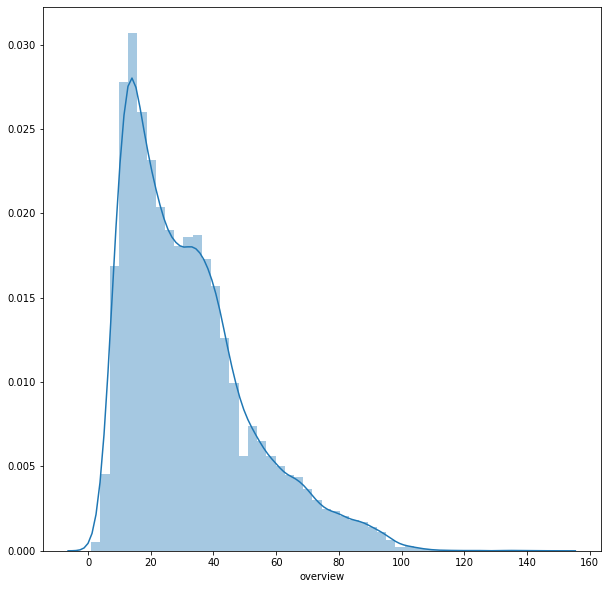

In [215]:
plt.figure(figsize=(10,10))
sns.distplot(new_data["overview"].apply(len))
plt.show()

In [216]:
# approximate sequence length limit to 60

# consider information loss and amount of data we have

In [220]:
X = new_data["overview"]
y = new_data["genres"]

In [227]:
seq_len = 60

# Tokenization

xtokenizer = tf.keras.preprocessing.text.Tokenizer()
xtokenizer.fit_on_texts(X)
X_tokenized = xtokenizer.texts_to_sequences(X)

# Padding
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_tokenized, padding="pre", maxlen=seq_len)

wd2ix = tokenizer.word_index
ix2wd = tokenizer.index_word

In [269]:
ytokenizer = tf.keras.preprocessing.text.Tokenizer()
ytokenizer.fit_on_texts(y)
y_tokenized = np.array(ytokenizer.texts_to_sequences(y))
idx2gen = ytokenizer.index_word
y_processed = pd.get_dummies(y_tokenized.reshape(-1)).values

In [249]:
cat_classes = y_tokenized.max()
N = X_padded.max() + 1
embedding_size = 500
input_length = seq_len
num_units = 1

model = tf.keras.Sequential([tf.keras.layers.Embedding(N, embedding_size)])

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = num_units)))

model.add(tf.keras.layers.Dense(units = cat_classes))

model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop")

model.fit(X_padded, y_processed, epochs = 5, batch_size = 1000, validation_split=0.25
            , callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss")])

Train on 29722 samples, validate on 9908 samples
Epoch 1/5
29722/29722 [==============================] - 28s 938us/sample - loss: 6.0633 - val_loss: 5.5827
Epoch 2/5
29722/29722 [==============================] - 25s 828us/sample - loss: 4.7219 - val_loss: 4.5880
Epoch 3/5
29722/29722 [==============================] - 24s 805us/sample - loss: 5.7252 - val_loss: 7.2878
Epoch 4/5
29722/29722 [==============================] - 25s 831us/sample - loss: 7.4453 - val_loss: 10.4016
Epoch 5/5
29722/29722 [==============================] - 24s 802us/sample - loss: 7.7143 - val_loss: 5.5178


In [278]:
tmp = "hi my name is"


'romance'

[[2472], [20060], [], [], [], [], [1826], [], [], [1572], [], [20060], []]

In [279]:
def nlp_master(inp):

    inp = inp.lower().split()

    inp_stopwords = [word for word in inp if word not in stopWords]

    inp_stemmed = [stemmer.stem(i) for i in inp_stopwords]
    inp_tokenized = xtokenizer.texts_to_sequences([inp_stemmed])
    inp_processed = tf.keras.preprocessing.sequence.pad_sequences(inp_tokenized, padding="pre", maxlen=seq_len)


    return idx2gen[tf.argmax(model.predict(inp_processed),1).numpy()[0]]

In [280]:
nlp_master("I killed a hound by the street. The hound returned as a ghost and haunted me for the rest of my life")

'romance'

In [281]:
nlp_master("Anne and Tom fell in love during high school. They went to university together, but during university, they broke up. Fortunately, in the end, they got married together and lived happily ever after")

'romance'

In [282]:
nlp_master('April 6th, 1917. As a regiment assembles to wage war deep in enemy territory, two soldiers are assigned to race against time and deliver a message that will stop 1,600 men from walking straight into a deadly trap.')

'romance'

In [283]:
nlp_master("After school, Jim found a dead body in the park. Turns out the body was his ex-girlfriend. Shocked and frightened Jim tries to find who the killer would be. Something seems real suspicious about his current girlfirend's father")

'romance'

In [284]:
nlp_master("After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe.")

'horror'

In [285]:
nlp_master("After a strange foreigner (June Kunimura) appears, the village is overturned by a mysterious chain of events. The police make a tentative conclusion with collective wild mushroom poisoning, Rumors and suspicions spread all the way that the cause of every incident is due to the stranger. The police “Jong-gu” (Kwak Do-won) met the woman “Mown” (Chun Woo-hee) who witnessed the scene. Starts convincing rumors about outsiders. 'Jung-gu' became urgent when his daughter Hyo-jin (Kim Hwan-hee) began to get sick with symptoms similar to the victims. They hunt for foreigners and bring in shamanic sunshine, Hwang Jung-min.")

'romance'

In [286]:
nlp_master("At the age of 21, Tim discovers he can travel in time and change what happens and has happened in his own life. His decision to make his world a better place by getting a girlfriend turns out not to be as easy as you might think.")

'romance'

In [287]:
nlp_master("Jo March reflects back and forth on her life, telling the beloved story of the March sisters - four young women each determined to live life on their own terms.")

'romance'